In [4]:
getwd()

setwd('/content')


[1] "/content"

In [5]:
Medical = read.csv('Medicaldataset_Mod_2.csv', header = T, stringsAsFactors = F)
#head
View(Medical)


Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result
<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
64,Male,66,160,83,160,1.800,0.012,negative
21,Male,94,98,46,296,6.750,1.060,positive
55,Male,64,160,77,270,1.990,0.003,negative
64,Male,70,120,55,270,13.870,0.122,positive
55,Male,64,112,65,300,1.080,0.003,negative
58,Female,61,112,58,87,1.830,0.004,negative
32,Female,40,179,68,102,0.710,0.003,negative
63,Male,60,214,82,87,300.000,2.370,positive
44,Female,60,154,81,135,2.350,0.004,negative


### Convertir la escala lineal a log
Se puede hacer en la misma variable o en este caso crear una nueva variable donde se gurada la CK-MB pero en escala logarítmica

A partir de este punto solo usé el campo CK.MB_log

In [6]:

Medical$Troponin_log <- log(Medical$Troponin)


head(Medical)

,Age,Gender,Heart.rate,Systolic.blood.pressure,Diastolic.blood.pressure,Blood.sugar,CK.MB,Troponin,Result,Troponin_log
,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,64,Male,66,160,83,160,1.80,0.012,negative,-4.42284863
2,21,Male,94,98,46,296,6.75,1.060,positive,0.05826891
3,55,Male,64,160,77,270,1.99,0.003,negative,-5.80914299
4,64,Male,70,120,55,270,13.87,0.122,positive,-2.10373423
5,55,Male,64,112,65,300,1.08,0.003,negative,-5.80914299
6,58,Female,61,112,58,87,1.83,0.004,negative,-5.52146092


In [7]:
library(ggplot2)

In [8]:
library(dplyr, warn.conflicts=FALSE)
grouped <- group_by(tbl_df(Medical),Result)
summarize(grouped, count = length(Result), mean = mean(Troponin_log), median = median(Troponin_log), stdev = sd(Troponin_log))

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


Result,count,mean,median,stdev
<chr>,<int>,<dbl>,<dbl>,<dbl>
negative,509,-5.148407,-5.115996,0.6560319
positive,810,-2.594000,-3.123566,2.1053561


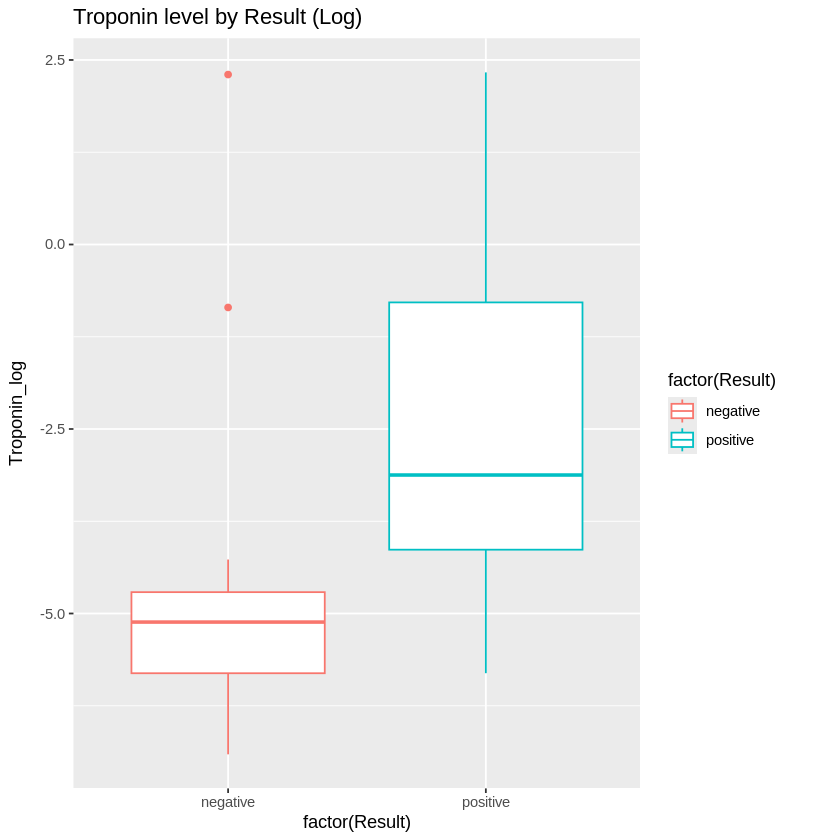

In [9]:
ggplot(grouped, aes(x=factor(Result),y=Troponin_log,color=factor(Result))) + geom_boxplot()+
        labs(title="Troponin level by Result (Log)")

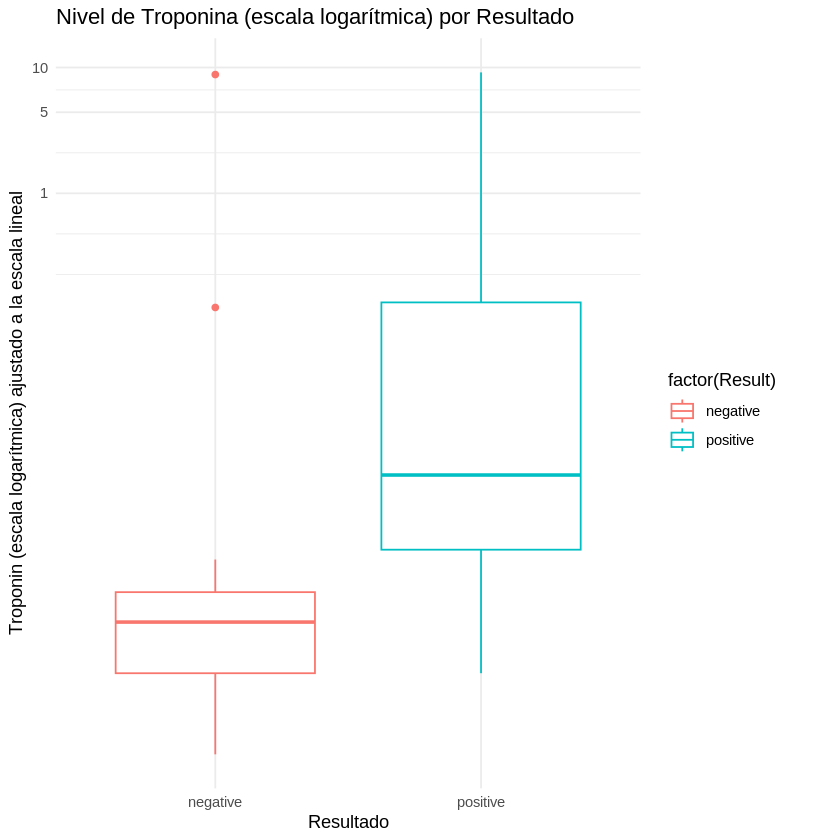

In [10]:

original_ticks_ckmb <- c(1, 5, 10, 50, 100, 500)

log_ticks_ckmb <- log1p(original_ticks_ckmb)

ggplot(Medical, aes(x=factor(Result), y=Troponin_log, color=factor(Result))) +
  geom_boxplot() +
  labs(title="Nivel de Troponina (escala logarítmica) por Resultado",
       y = "Troponin (escala logarítmica) ajustado a la escala lineal",
       x = "Resultado") +
  scale_y_continuous(breaks = log_ticks_ckmb,
                     labels = original_ticks_ckmb) +
  theme_minimal()

In [ ]:
Medical_ttest <- t.test(Troponin_log ~ Result, data = Medical)
Medical_ttest


	Welch Two Sample t-test

data:  Troponin_log by Result
t = -32.137, df = 1038.8, p-value < 2.2e-16
alternative hypothesis: true difference in means between group negative and group positive is not equal to 0
95 percent confidence interval:
 -2.710376 -2.398439
sample estimates:
mean in group negative mean in group positive 
             -5.148407              -2.594000 


install.packages("DataExplorer")
library(DataExplorer)

In [ ]:
#detect outlyers_CK.MB
# 1. Get the outlier values
boxplot_stats <- boxplot.stats(Medical$Troponin_log)
outlier_values <- boxplot_stats$out

# 2. Find the row numbers where these outlier values appear in the original column
#    We use `which()` to get the indices (row numbers) where the values match any of the outliers.
outlier_rows <- which(Medical$Troponin_log %in% outlier_values)

# 3. Combine the row numbers and outlier values into a data frame for a clear list
outlier_info <- data.frame(
  Row_ID = outlier_rows,
  Outlier_Value = Medical$Troponin_log[outlier_rows] # Get the actual outlier value for that row
)

# Print the list of outlier IDs and their values
print(outlier_info)

   Row_ID Outlier_Value
1      13      1.680828
2      30      2.302585
3      31      2.116256
4      90      1.800058
5     114      2.037317
6     279      1.619388
7     434      1.669592
8     467      1.701105
9     476      2.209373
10    754      2.302585
11    797      1.769855
12    936      1.793425
13    989      2.332144
14   1004      2.302585
15   1029      2.302585
16   1049      2.302585
17   1095      2.302585
18   1132      1.686399
19   1154      1.631199
20   1253      2.302585
21   1311      2.302585


In [ ]:
library(dplyr, warn.conflicts=FALSE)
grouped <- group_by(tbl_df(Medical),Result)
summarize(grouped, count = length(Result), mean = mean(Troponin_log), median = median(Troponin_log), stdev = sd(Troponin_log))

Warning message:
“`tbl_df()` was deprecated in dplyr 1.0.0.
ℹ Please use `tibble::as_tibble()` instead.”


ERROR: Error: object 'Medical' not found
